In [1]:
# Connecting a neuron to spike generators
from sklearn.svm import LinearSVC
from scipy.special import erf
import pylab

import nest

# Create a neuron and poisson spike generators
neuron = nest.Create("iaf_psc_alpha")
noise_ex = nest.Create("poisson_generator")
noise_in = nest.Create("poisson_generator")

# Change neurons' parameters
nest.SetStatus(neuron, {"I_e": 0.0})
nest.SetStatus(noise_ex, {"rate": 80000.0})
nest.SetStatus(noise_in, {"rate": 15000.0})

# Generate analysis apparatus
multimeter = nest.Create("multimeter")
nest.SetStatus(multimeter, {"withtime":True, "record_from":["V_m"]})
spikedetector = nest.Create("spike_detector", params={"withgid": True, "withtime": True})

# Define model parameters
syn_dict_ex = {"weight": 1.2}
syn_dict_in = {"weight": -2.0}

# Make Connections
nest.Connect(multimeter, neuron)
nest.Connect(neuron, spikedetector)
nest.Connect(noise_ex, neuron, syn_spec=syn_dict_ex)
nest.Connect(noise_in, neuron, syn_spec=syn_dict_in)

# Simulate
nest.Simulate(1000.0)

# Get simulation data from the multimeter
dmm = nest.GetStatus(multimeter)[0]
Vms = dmm["events"]["V_m"]
ts1 = dmm["events"]["times"]

# Get simulation data from the spike detector
dSD = nest.GetStatus(spikedetector,keys="events")[0]
evs = dSD["senders"]
ts2 = dSD["times"]

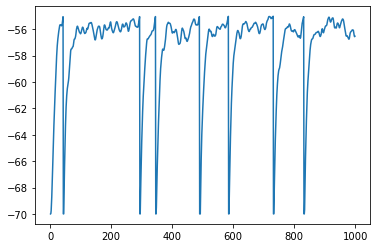

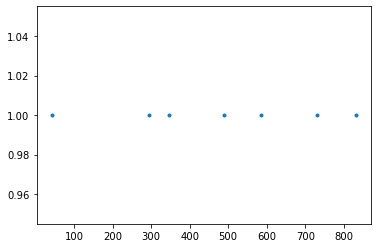

In [2]:
# Plot analysis
pylab.figure(1)
pylab.plot(ts1, Vms)

pylab.figure(2)
pylab.plot(ts2, evs, ".")
pylab.show()